First import all what we need and install if we don't already have it:

In [1]:
try:
    from pyscf import gto
    print("Found pyscf")
except:
    print("Can't import, installing via pip")
    !pip3 install pyscf
    from pyscf import gto

try:
    import numpy as np
    print("Found numpy")
except:
    print("Can't import, installing via pip")
    !pip3 install numpy
    import numpy as np

try:
    import matplotlib.pyplot as plt
    print("Found matplotlib")
except:
    print("Can't import, installing via pip")
    !pip3 install matplotlib
    import matplotlib.pyplot as plt

Found pyscf
Found numpy
Found matplotlib


Next, set which range of bond distance you want to do:

In [2]:
length = np.around(np.linspace(0.2, 4.0, 20), decimals=2, out=None)

Now we build our hydrogen molecule with a set bond distance and do an energy calculation, writing to a file

In [3]:
mol = gto.Mole()

with open(r'./ps.dat', mode='w') as f:
    for x in length:
        mol.build(
            atom = f'H 0 0 0; H 0 0 {x}', # in Angstrom, choose your elements here
            basis = 'augccpvqz', #choose your basis set
            symmetry = True,
        )
        mf = mol.RHF().run()
        print(f'{mf.e_tot * 27.2114079527} eV')
    
        res = f'{x} {mf.e_tot * 27.2114079527}'
        f.write(f'{res}\n')

/usr/local/lib/python3.11/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = 0.0463732882924912
1.261882465835145 eV
converged SCF energy = -0.942248124194469
-25.639898100122036 eV
converged SCF energy = -1.11620378442275
-30.37347653627511 eV
converged SCF energy = -1.13076400307553
-30.76968058591643 eV
converged SCF energy = -1.10248804116495
-30.000251851112694 eV
converged SCF energy = -1.06332604610006
-28.934598827160297 eV
converged SCF energy = -1.02368893660249
-27.856017270555885 eV
converged SCF energy = -0.987112723277715
-26.86072700841057 eV
converged SCF energy = -0.954634833053159
-25.97695788806717 eV
converged SCF energy = -0.926332599878499
-25.206814275179063 eV
converged SCF energy = -0.901914475454077
-24.54236273002633 eV
converged SCF energy = -0.880962354485098
-23.972226018865104 eV
converged SCF energy = -0.863036420201137
-23.484436108130957 eV
converged SCF energy = -0.847719212875052
-23.067633330884785 eV
converged SCF energy = -0.834632648086063
-22.71152947771215 eV
converged SCF energy = -0.823443027726

In [4]:
pes = np.loadtxt(r'./ps.dat')
dis = pes[:,0]
energy = pes[:,1]

<Figure size 640x480 with 0 Axes>

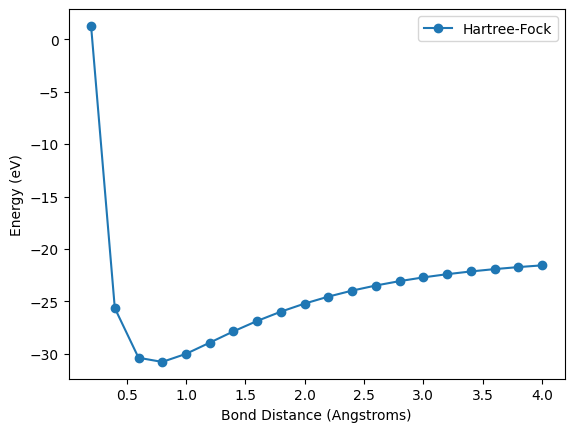

<Figure size 640x480 with 0 Axes>

In [5]:
fig = plt.figure()

plt.xlabel('Bond Distance (Angstroms)')
plt.ylabel('Energy (eV)')

plt.plot(dis, energy, marker='o', label='Hartree-Fock')

plt.legend()

#plt.savefig('fig1.pdf')

plt.figure()

1. Read the documentation for pyscf for performing MP2 calculations (https://pyscf.org/user/mp.html). Perform the same calculations as before but with MP2.
2. Read the documentation for performing full CI calculations (https://pyscf.org/user/ci.html). Repeat the dissociation curve for CI.
3. Comment on the shapes, minima energy, and minima bond distances of the dissociation curves.